In [16]:
import gzip
import json
import ast
import numpy as np

def parse(path, limit):# limit+1 many reviews will get printed
    i = 0
    reviews_in_bytes = []
    file = gzip.open(path,'r')
    for line in file:
        if i > limit:
            break
        reviews_in_bytes.append(line)
        i += 1
    return reviews_in_bytes
    
        
mylist = parse('reviews_Musical_Instruments.json.gz',10**2)
reviewer_item_pair = []
reviewer_list = []
item_list = []
for review in mylist:
    byte_str = review
    dict_str = byte_str.decode("UTF-8")
    mydata = ast.literal_eval(dict_str)
    #reviewer_item_pair.append((mydata["reviewerID"],mydata["asin"]))
    reviewer_list.append(mydata["reviewerID"])
    item_list.append(mydata["asin"])
    
print(reviewer_item_pair)


[]


In [1]:
# The code to set the whole table on pandas is the following:
import gzip
import json
import ast
import numpy as np
import pandas as pd

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')
df = getDF('reviews_Amazon_Instant_Video.json.gz')[['reviewerID','asin']]
#df  is the whole table of data, we need to act on this
# very imp code : https://stackoverflow.com/questions/49405101/grouping-all-rows-of-a-pandas-dataframewith-many-columns-with-the-same-value-i
#df = df[['reviewerID','asin']]
df1 = df.astype(str).groupby('asin').agg(','.join).reset_index()
df1

,asin,reviewerID
0,B000GFDAUG,"A1EE2E3N7PW666,AGZ8SM1BGK3CK"
1,B000GIOPK2,"A2VHZ21245KBT7,ACX8YW2D5EGP6,A9RNMO9MUSMTJ,A3S..."
2,B000GIPKWY,"A1ZAVMB4XZL8KA,A223A5BICW5T32,A3I8OURC83NM6V,A..."
3,B000GJUQ7M,"A21YD7FBMV01HP,A1LMX2N66EYKB4,AGPOJFLTYSMFW"
4,B000GK0NBK,"A35O4YSNIEHCR,A1ALC8JP5D7C3C"
...,...,...
23960,B00LTMFX9Q,"A37IYQC8EKLDYJ,AJE4MXRQ5W9JU"
23961,B00LTMHUW4,A9MBSKL8LTFN9
23962,B00LTMJ29S,A3U3RFL0XE4F7V
23963,B00LU8ONBI,"AEO407GROR6JB,A2YXWWVABHWIXN"


In [19]:
#test = df1.head()
user_arr = df1['reviewerID'].tolist()
for i in range(len(user_arr)):
    x = user_arr[i]
    newx = x.split(",")
    user_arr[i] = len(newx)
arr = np.array(user_arr)
l = list(range(23965))
l = np.array(l)
len(user_arr)

array([    0,     1,     2, ..., 23962, 23963, 23964])

<AxesSubplot:xlabel='products'>

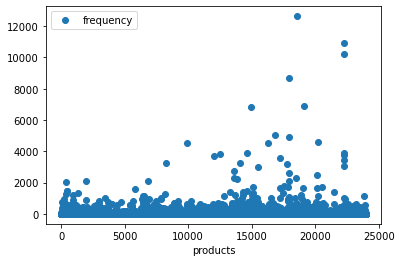

In [20]:
import matplotlib.pyplot as plt
sample_data={'products':l,
      'frequency': arr}
newdf= pd.DataFrame(sample_data)
newdf.plot(x='products', y='frequency', style='o')

In [22]:
# The code to set the whole table on pandas is the following:
import gzip
import json
import ast
import numpy as np
import pandas as pd

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')
df = getDF('reviews_Amazon_Instant_Video.json.gz')[['reviewerID','asin']]
#df  is the whole table of data, we need to act on this
# very imp code : https://stackoverflow.com/questions/49405101/grouping-all-rows-of-a-pandas-dataframewith-many-columns-with-the-same-value-i
#df = df[['reviewerID','asin']]
df2 = df.astype(str).groupby('reviewerID').agg(','.join).reset_index()
df2

,reviewerID,asin
0,A00019103H5DUGXXX2UPR,B007427XS4
1,A00026003EPLG5C4D6XFL,B00LCDVU8A
2,A00028442OH78WL2CMSVT,B008QTTGGG
3,A00032403IMUSNRLR3XK7,B009FZFONO
4,A00039704LRQG87MSTUJ,B004CTBG1W
...,...,...
426917,AZZYKX2KZ0Q82,B00FL7UCB4
426918,AZZYN72HX9NHS,B003E8ZYGK
426919,AZZYUA6JI1MO0,"B00CBLGJY2,B00DVFR6PI"
426920,AZZYW4YOE1B6E,B009AP3HQK


In [29]:
item_arr = df2['asin'].tolist()
for i in range(len(item_arr)):
    x = item_arr[i]
    newx = x.split(",")
    item_arr[i] = len(newx)
newarr = np.array(item_arr)
L = list(range(426922))
L = np.array(L)
len(item_arr)

426922

<AxesSubplot:xlabel='reviewers'>

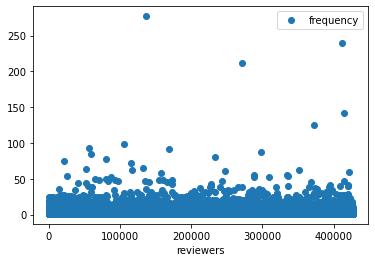

In [30]:
import matplotlib.pyplot as plt
sample_data={'reviewers':L,
      'frequency': newarr}
new_df= pd.DataFrame(sample_data)
new_df.plot(x='reviewers', y='frequency', style='o')